# Análise Exploratoria dos Dados

In [165]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

df = pd.read_csv('train.csv') # df com todos os dados

display(train)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


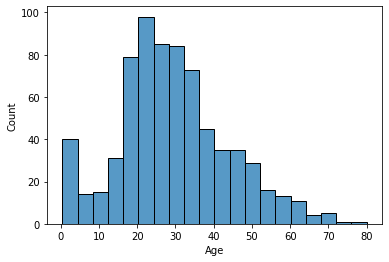

In [168]:
pd.crosstab(df['Embarked'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Um grupo tendo preferencia em sobreviver sobre outro
pd.crosstab(df['Sex'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

df_age_dead_surv = pd.crosstab(pd.cut(df['Age'], bins = [0,2,5,10,20,30,40,50,60,70,80,90,100]), df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Pessoas por idade
sns.histplot(df, x = df['Age'])

#mean_age,median_age (29.69911764705882, 28.0) -> Assimetrica a direita
mean_age = df['Age'].mean()
median_age = df['Age'].median()

A partir do Gráfico acima, podemos observar a distribuição assimétrica à direita referente à variável idade.

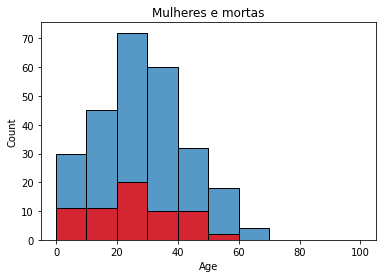

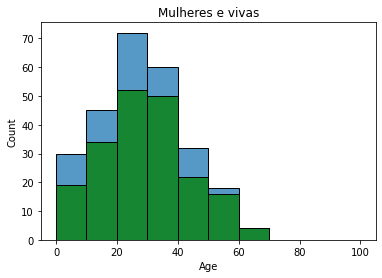

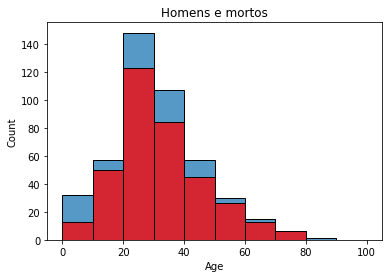

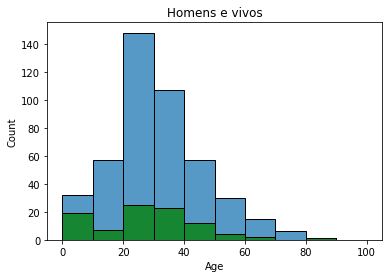

In [159]:
k = [i for i in range(0, 110,10)]

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 0'), x = df.query('Sex == "female" and Survived == 0')['Age'], bins = k,color = 'red').set(title = 'Mulheres e mortas')
plt.show()

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 1'), x = df.query('Sex == "female" and Survived == 1')['Age'], bins = k,color = 'green').set(title = 'Mulheres e vivas')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 0'), x = df.query('Sex == "male" and Survived == 0')['Age'], bins = k, color = 'red').set(title = 'Homens e mortos')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 1'), x = df.query('Sex == "male" and Survived == 1')['Age'], bins = k, color = 'green').set(title = 'Homens e vivos')
plt.show()



C:\Users\User\Anaconda3\envs\bootcamp_dados\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




q1: 20.125 (0 a 25% da pop.)
q2: 28.0 (até 50% da pop. mediana)
q3: 38.0 (até 75% da pop.)
iqr: 17.875
mínimo: -6.6875
máximo: 64.8125

qnt_outliers: 11

Outliers:       Age                                  Name
33   66.0                 Wheadon, Mr. Edward H
54   65.0        Ostby, Mr. Engelhart Cornelius
96   71.0             Goldschmidt, Mr. George B
116  70.5                  Connors, Mr. Patrick
280  65.0                      Duane, Mr. Frank
456  65.0             Millet, Mr. Francis Davis
493  71.0               Artagaveytia, Mr. Ramon
630  80.0  Barkworth, Mr. Algernon Henry Wilson
672  70.0           Mitchell, Mr. Henry Michael
745  70.0          Crosby, Capt. Edward Gifford
851  74.0                   Svensson, Mr. Johan




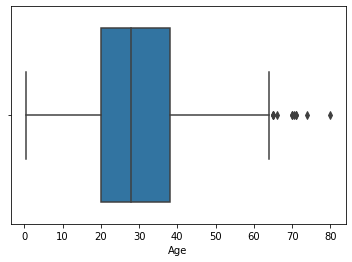

In [171]:
titanic = df

q1 = titanic['Age'].quantile(q = 0.25)
q2 = titanic['Age'].quantile(q = 0.5)
q3 = titanic['Age'].quantile(q = 0.75)

iqr = q3 - q1 

minimo = q1 - 1.5 * iqr 
maximo = q3 + 1.5 * iqr

# outlier
num_outliers = len(titanic[titanic['Age'] > maximo])
dict_outliers = titanic[titanic['Age'] > maximo][['Age', 'Name']]

sns.boxplot(titanic['Age'])

print(f'''

q1: {q1} (0 a 25% da pop.)
q2: {q2} (até 50% da pop. mediana)
q3: {q3} (até 75% da pop.)
iqr: {iqr}
mínimo: {minimo}
máximo: {maximo}

qnt_outliers: {num_outliers}

Outliers: {dict_outliers}

''')


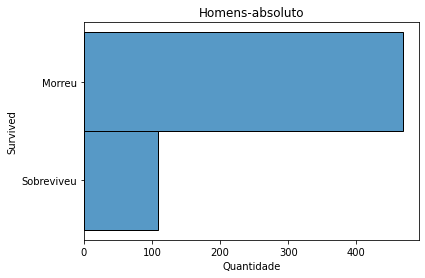

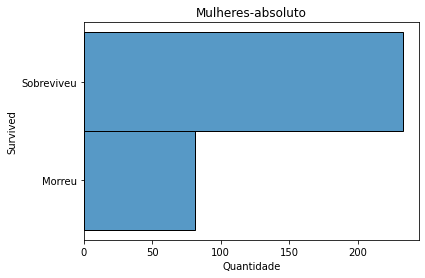

In [172]:
# Titanic Analise dos homens e mulheres
sns.histplot(titanic.query('Sex == "male"'), y = titanic.query('Sex == "male"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Homens-absoluto', xlabel = 'Quantidade')
plt.show()

sns.histplot(titanic.query('Sex == "female"'), y = titanic.query('Sex == "female"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Mulheres-absoluto', xlabel = 'Quantidade')
plt.show()

,Morreu,Sobreviveu
Sex,,
female,81,233
male,468,109


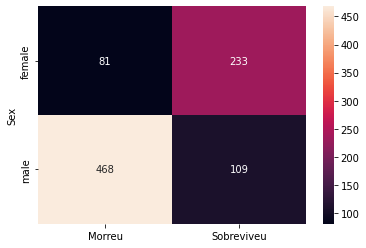

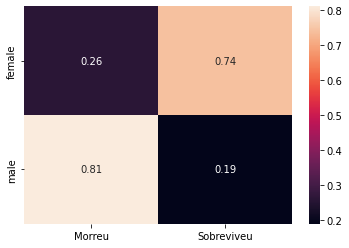

In [173]:
df_analise_morte = pd.crosstab(titanic['Sex'], titanic['Survived'])
df_analise_morte.columns = ['Morreu' , 'Sobreviveu']

display(df_analise_morte)

sns.heatmap(df_analise_morte, annot=True , fmt = '.0f')
plt.show()

meninas_mortas = df_analise_morte['Morreu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_mortos = df_analise_morte['Morreu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])
meninas_vivas = df_analise_morte['Sobreviveu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_vivos = df_analise_morte['Sobreviveu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])

df_relativo = pd.DataFrame(
    data = {'Morreu': [meninas_mortas, meninos_mortos], 
    'Sobreviveu': [meninas_vivas, meninos_vivos]},
    index = ['female', 'male'])

sns.heatmap(df_relativo, annot=True )
plt.show()
